In [1]:
import numpy as np
from Q_maze import Q_maze, plot_steps_per_episode_comp

In [2]:
# Generacion de un ejemplo de matriz de recompensas (ver excel)
rewards = np.ones((9,9))*-100
rewards[1,0:6] = - 1
rewards[2,3] = -1
rewards[3,1:4] = -1
rewards[4,1] = -1
rewards[5,1:8] = -1
rewards[6,1] = -1
rewards[7,0:2] = -1
rewards[7,3:6] = -1
rewards[3:8,5] = -1
rewards[1:8,7] = -1
rewards[2,8] = 500
print(rewards)

estado_inicio = [1, 0] # Cambiar estos valores si se quiere evaluar otro estado en el que el agente comience su recorrido.

n_iter = 400
alpha = 0.9
gamma = 0.9
epsilon = 0.1

#Laberinto con paredes de fuego. Notar que se esta utilizando el metodo UCB1, y no e-greedy. Cambiar el parametro a method = 'e-greedy' si lo desea.
exp3 = Q_maze(rewards, episodes = n_iter, discount_rate = gamma, alpha = alpha, method = 'exp3', game='fire-walls') 
exp3.train()

en_greedy = Q_maze(rewards, episodes = n_iter, discount_rate = gamma, alpha = alpha, method = 'en-greedy', game='fire-walls', c = 1, d = 1) 
en_greedy.train()

softmax_exp = Q_maze(rewards, episodes = n_iter, discount_rate = gamma, alpha = alpha, method = 'softmax', game='fire-walls', temperature = 1) 
softmax_exp.train()

ucb1 = Q_maze(rewards, episodes = n_iter, discount_rate = gamma, alpha = alpha, method = 'UCB1', game='fire-walls') 
ucb1.train()

e_greedy = Q_maze(rewards, episodes = n_iter, discount_rate = gamma, alpha = alpha, epsilon = epsilon, method = 'e-greedy', game='fire-walls')
e_greedy.train()

[[-100. -100. -100. -100. -100. -100. -100. -100. -100.]
 [  -1.   -1.   -1.   -1.   -1.   -1. -100.   -1. -100.]
 [-100. -100. -100.   -1. -100. -100. -100.   -1.  500.]
 [-100.   -1.   -1.   -1. -100.   -1. -100.   -1. -100.]
 [-100.   -1. -100. -100. -100.   -1. -100.   -1. -100.]
 [-100.   -1.   -1.   -1.   -1.   -1.   -1.   -1. -100.]
 [-100.   -1. -100. -100. -100.   -1. -100.   -1. -100.]
 [  -1.   -1. -100.   -1.   -1.   -1. -100.   -1. -100.]
 [-100. -100. -100. -100. -100. -100. -100. -100. -100.]]


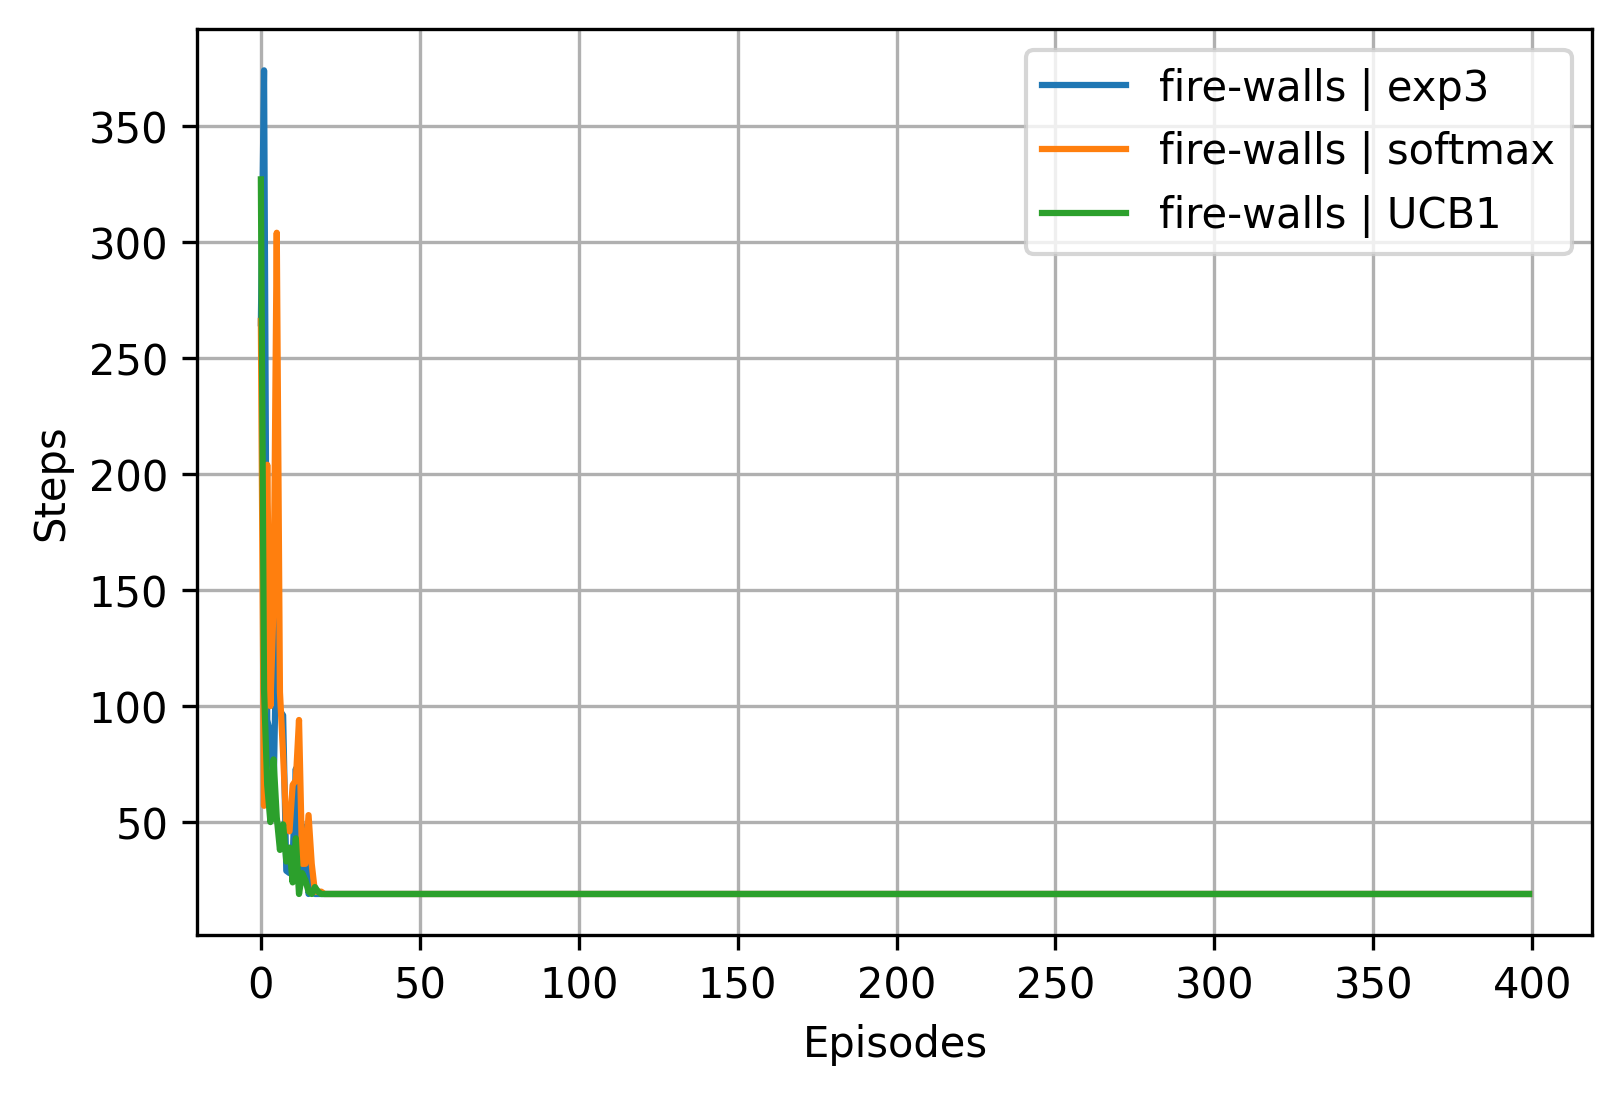

In [3]:
plot_steps_per_episode_comp([exp3, softmax_exp, ucb1], 300)

In [1]:
import numpy as np
from Q_maze import Q_maze, plot_steps_per_episode_comp, generate_maze, plot_maze

In [2]:
# Ejemplo de uso
maze_size = 44
start_point = (1, 0)
end_point = (maze_size - 2, maze_size - 1)

maze = generate_maze(maze_size, maze_size, start_point, end_point)

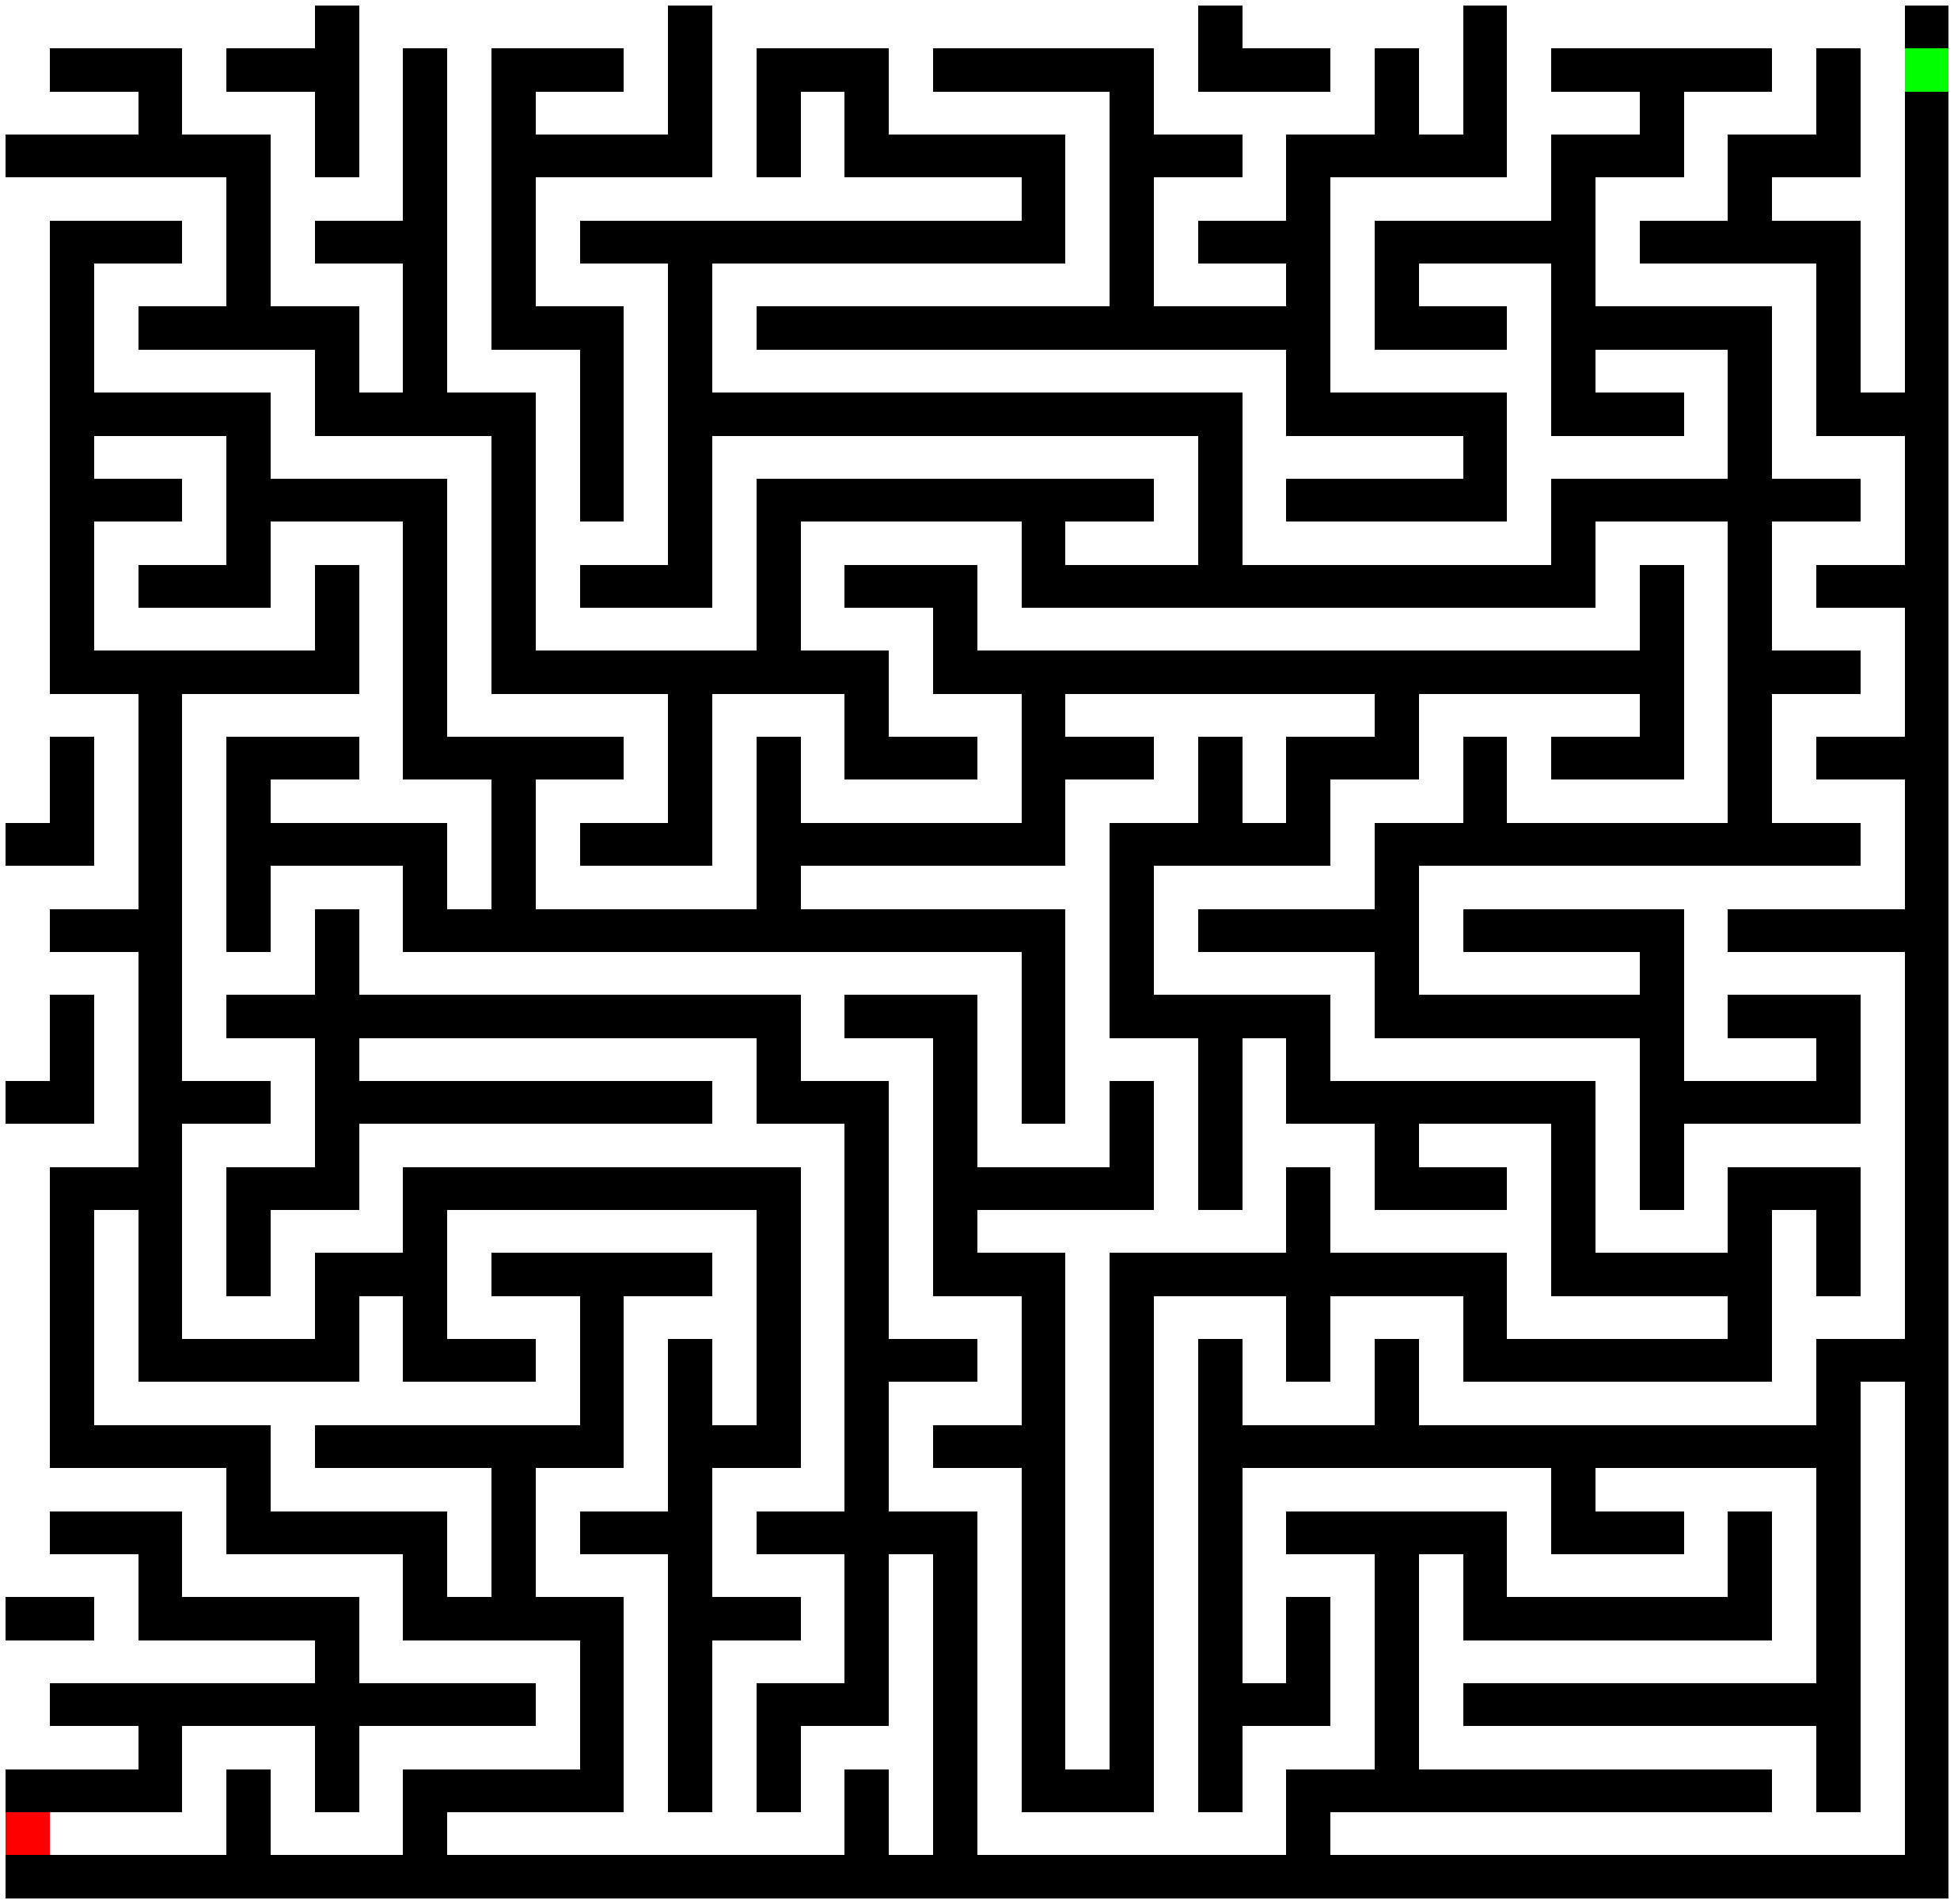

In [3]:
# Imprimir el laberinto generado
plot_maze(maze, start_point, end_point)

## Evaluación de modelos

In [5]:
n_iter = 500
alpha = 0.9
gamma = 0.9
epsilon = 0.1
maze = np.matrix(maze)

In [6]:
exp3_t2 = Q_maze(maze, episodes = n_iter, discount_rate = gamma, alpha = alpha, method = 'exp3', expression='t^2', game='fire-walls') 
exp3_t2.train()

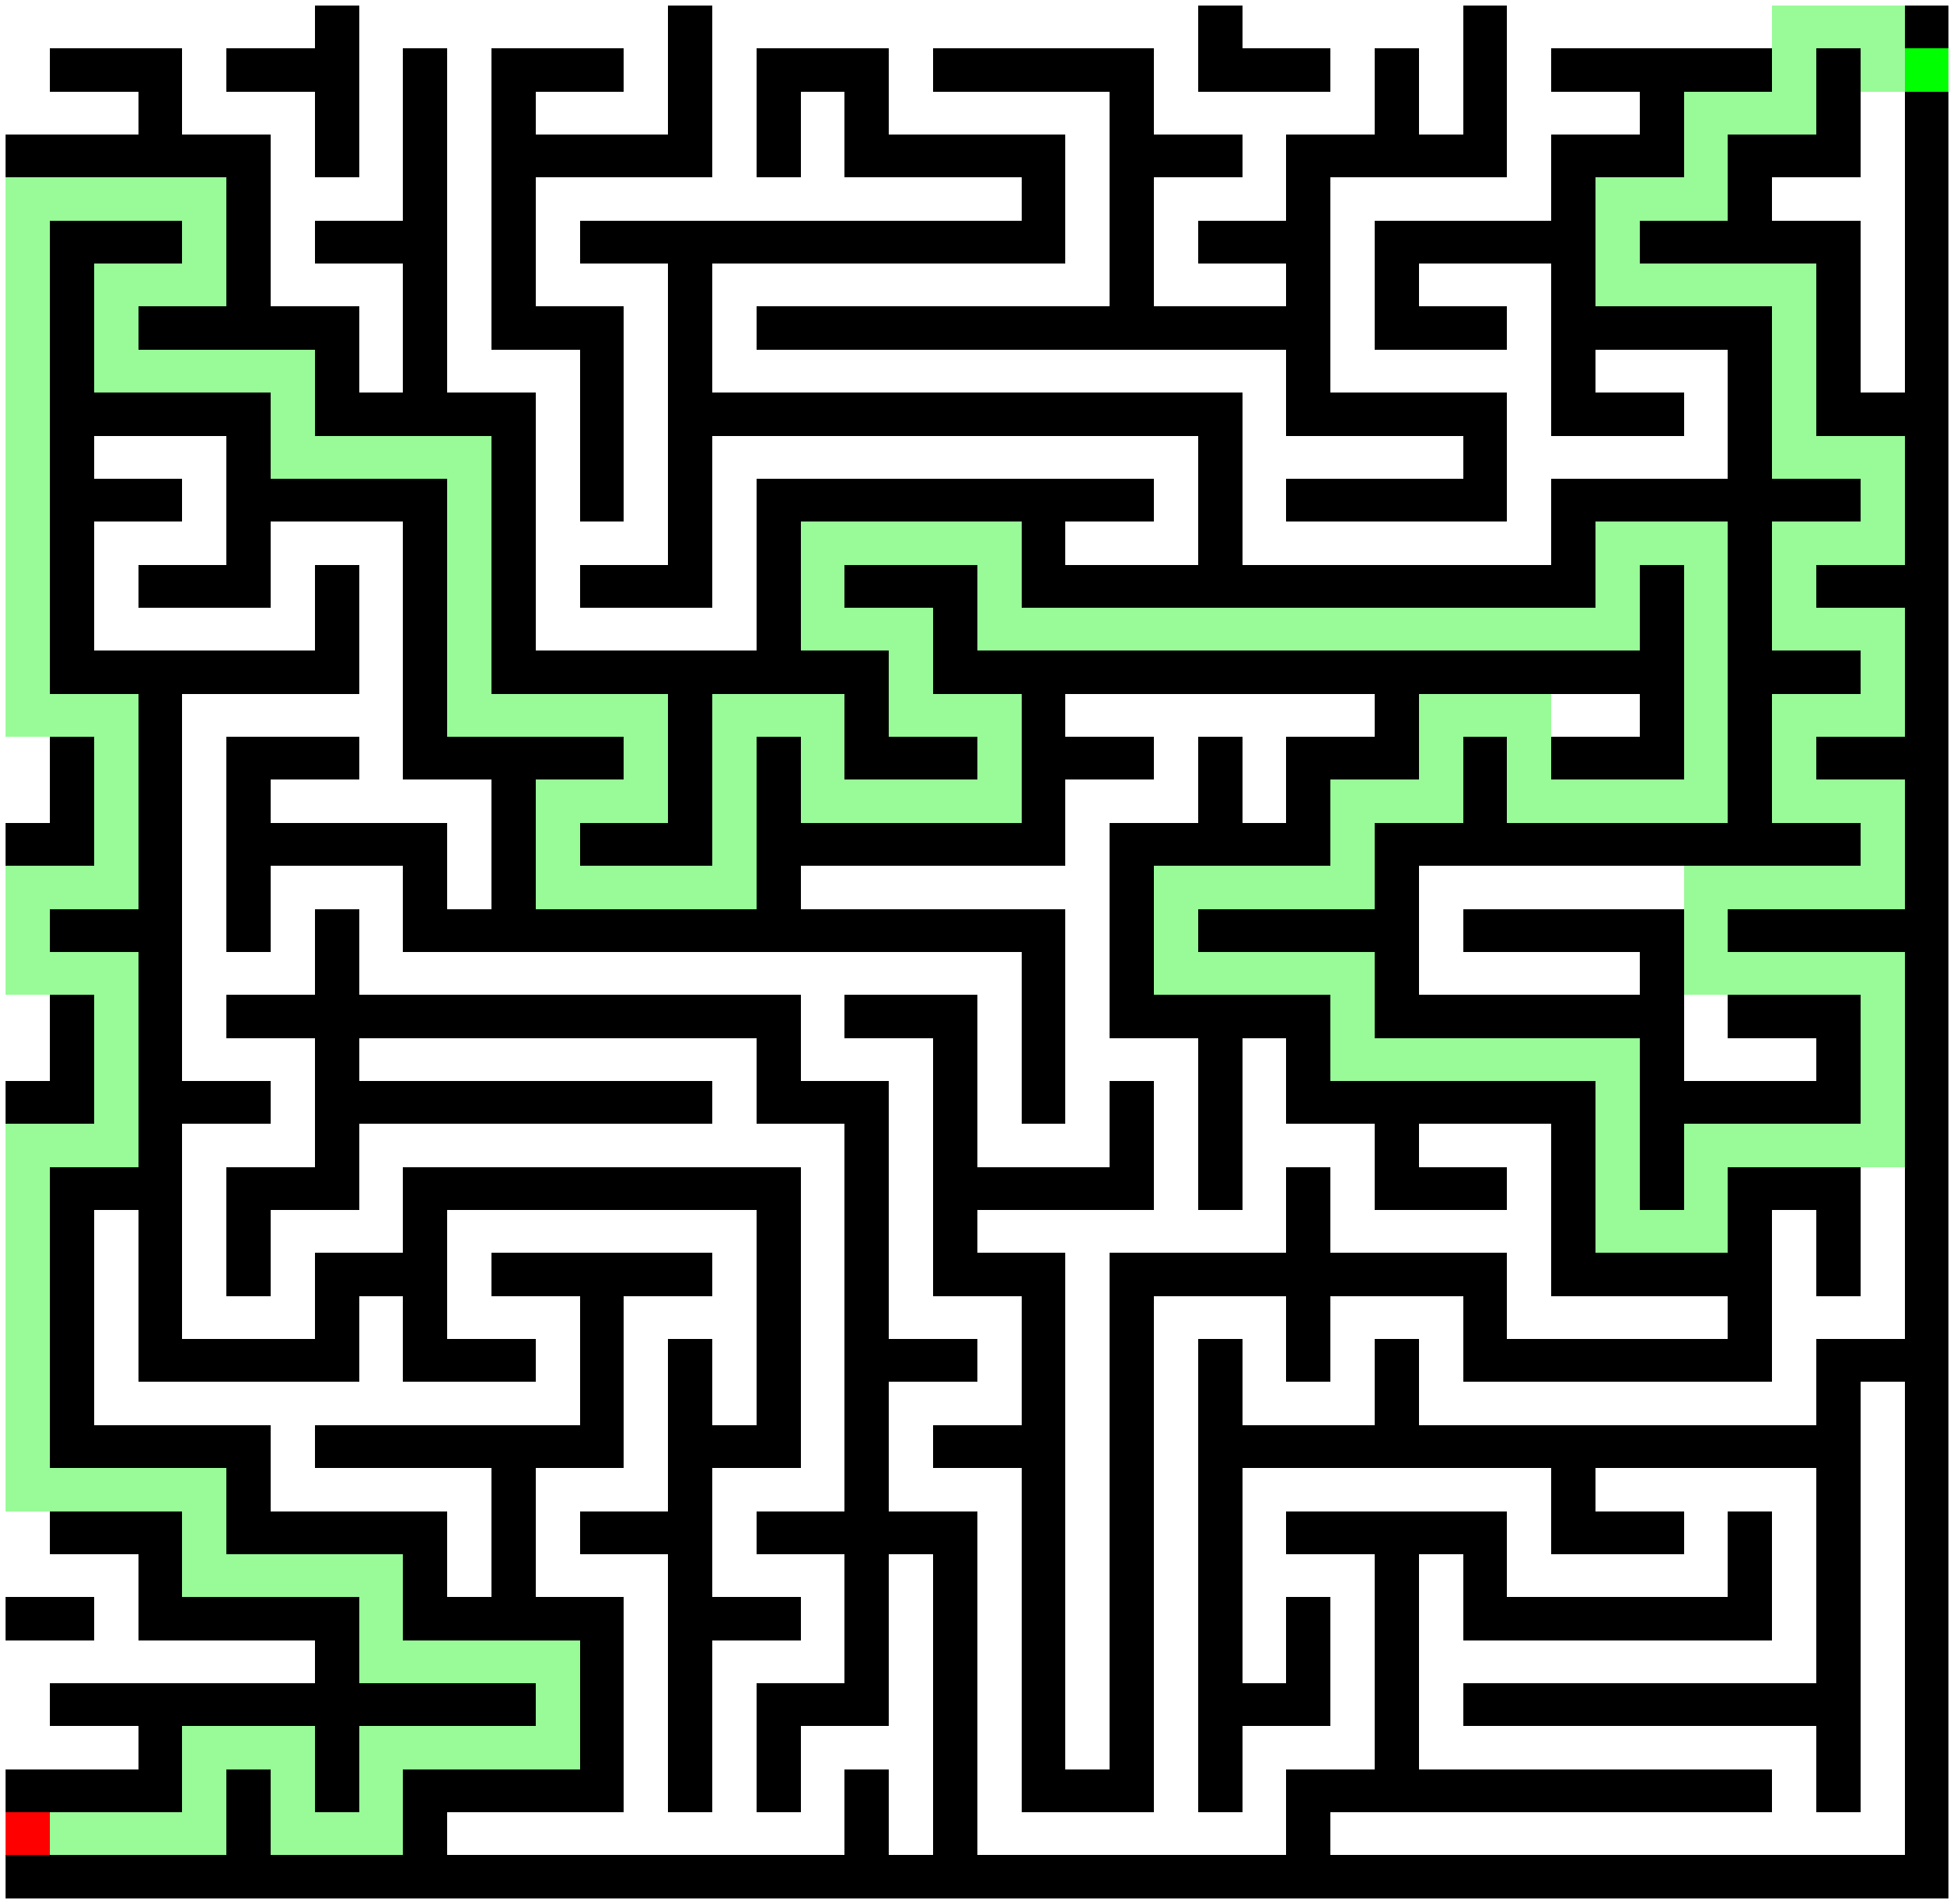

In [11]:
path = exp3_t2.best_path(start_point)
plot_maze(maze, start_point, end_point, path = path)

In [72]:
exp3_sqrt_t = Q_maze(maze, episodes = n_iter, discount_rate = gamma, alpha = alpha, method = 'exp3', expression='\sqrt{t}', game='fire-walls') 
exp3_sqrt_t.train()

In [73]:
ucb1 = Q_maze(maze, episodes = n_iter, discount_rate = gamma, alpha = alpha, method = 'UCB1', game='fire-walls') 
ucb1.train()

In [74]:
#Laberinto con paredes de fuego.
# exp3 = Q_maze(maze, episodes = n_iter, discount_rate = gamma, alpha = alpha, method = 'exp3', game='fire-walls') 
# exp3.train()


exp3_t2_T = Q_maze(maze, episodes = n_iter, discount_rate = gamma, alpha = alpha, method = 'exp3', expression='t^2/T', game='fire-walls') 
exp3_t2_T.train()

# exp3_ln_t = Q_maze(maze, episodes = n_iter, discount_rate = gamma, alpha = alpha, method = 'exp3', expression='\log t', game='fire-walls') 
# exp3_ln_t.train()

# exp3_sqrt_t = Q_maze(maze, episodes = n_iter, discount_rate = gamma, alpha = alpha, method = 'exp3', expression='\sqrt{t}', game='fire-walls') 
# exp3_sqrt_t.train()

# softmax_exp_1 = Q_maze(maze, episodes = n_iter, discount_rate = gamma, alpha = alpha, method = 'softmax', temperature = 0.1, game='fire-walls') 
# softmax_exp_1.train()

# softmax_exp_2 = Q_maze(maze, episodes = n_iter, discount_rate = gamma, alpha = alpha, method = 'softmax', temperature = 2, game='fire-walls') 
# softmax_exp_2.train()

# softmax_exp_3 = Q_maze(maze, episodes = n_iter, discount_rate = gamma, alpha = alpha, method = 'softmax', temperature = 3, game='fire-walls') 
# softmax_exp_3.train()

# softmax_exp_4 = Q_maze(maze, episodes = n_iter, discount_rate = gamma, alpha = alpha, method = 'softmax', temperature = 4, game='fire-walls') 
# softmax_exp_4.train()

# ucb1 = Q_maze(maze, episodes = n_iter, discount_rate = gamma, alpha = alpha, method = 'UCB1', game='fire-walls') 
# ucb1.train()

# plot_steps_per_episode_comp([exp3, softmax_exp_1, softmax_exp_2,softmax_exp_3, softmax_exp_4, ucb1], dpi=100)
# plot_steps_per_episode_comp([exp3,exp3_t, exp3_t2_T, ucb1], dpi=100)
# plot_steps_per_episode_comp([exp3,exp3_t, exp3_ln_t, exp3_sqrt_t, exp3_t2_T, ucb1], dpi=100)


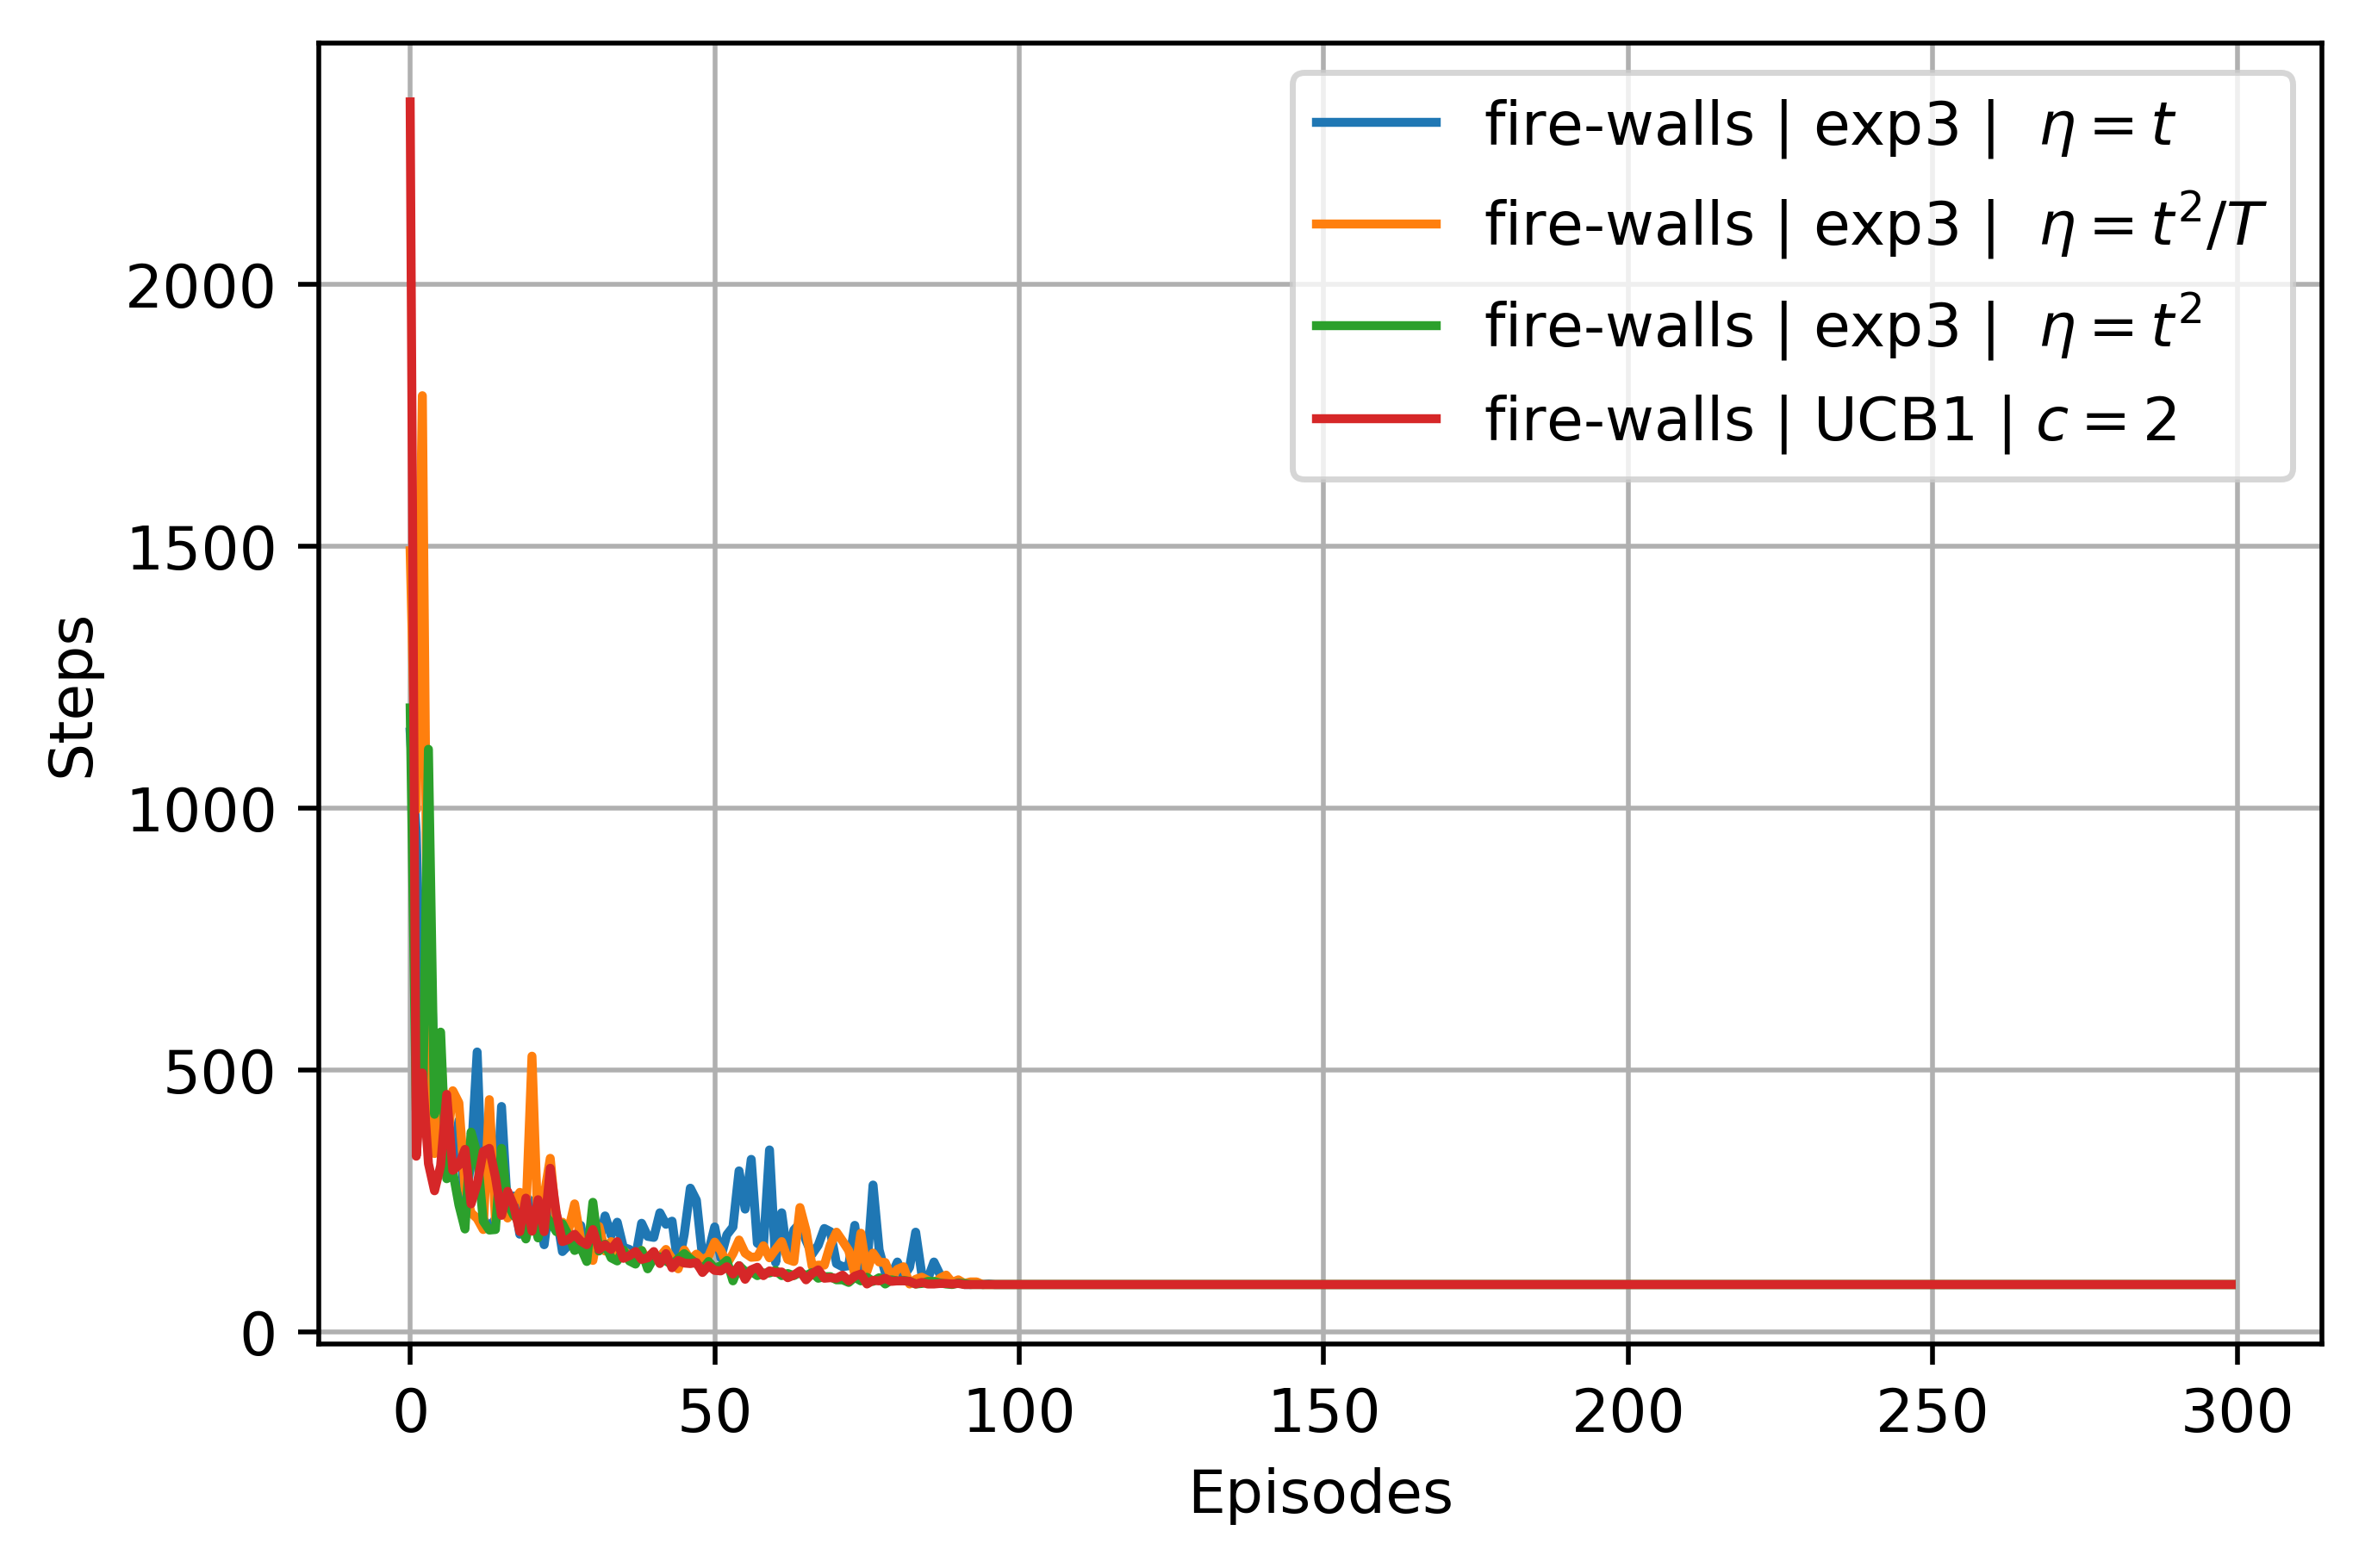

In [75]:
plot_steps_per_episode_comp([exp3_t, exp3_t2_T, exp3_t2, ucb1], dpi=500)

In [63]:
exp3_t2_2 = Q_maze(maze, episodes = n_iter, discount_rate = gamma, alpha = alpha, method = 'exp3', expression='t^2', game='fire-walls') 
exp3_t2_2.train()
exp3_t2_3 = Q_maze(maze, episodes = n_iter, discount_rate = gamma, alpha = alpha, method = 'exp3', expression='t^2', game='fire-walls') 
exp3_t2_3.train()
exp3_t2_4 = Q_maze(maze, episodes = n_iter, discount_rate = gamma, alpha = alpha, method = 'exp3', expression='t^2', game='fire-walls') 
exp3_t2_4.train()
exp3_t2_5 = Q_maze(maze, episodes = n_iter, discount_rate = gamma, alpha = alpha, method = 'exp3', expression='t^2', game='fire-walls') 
exp3_t2_5.train()

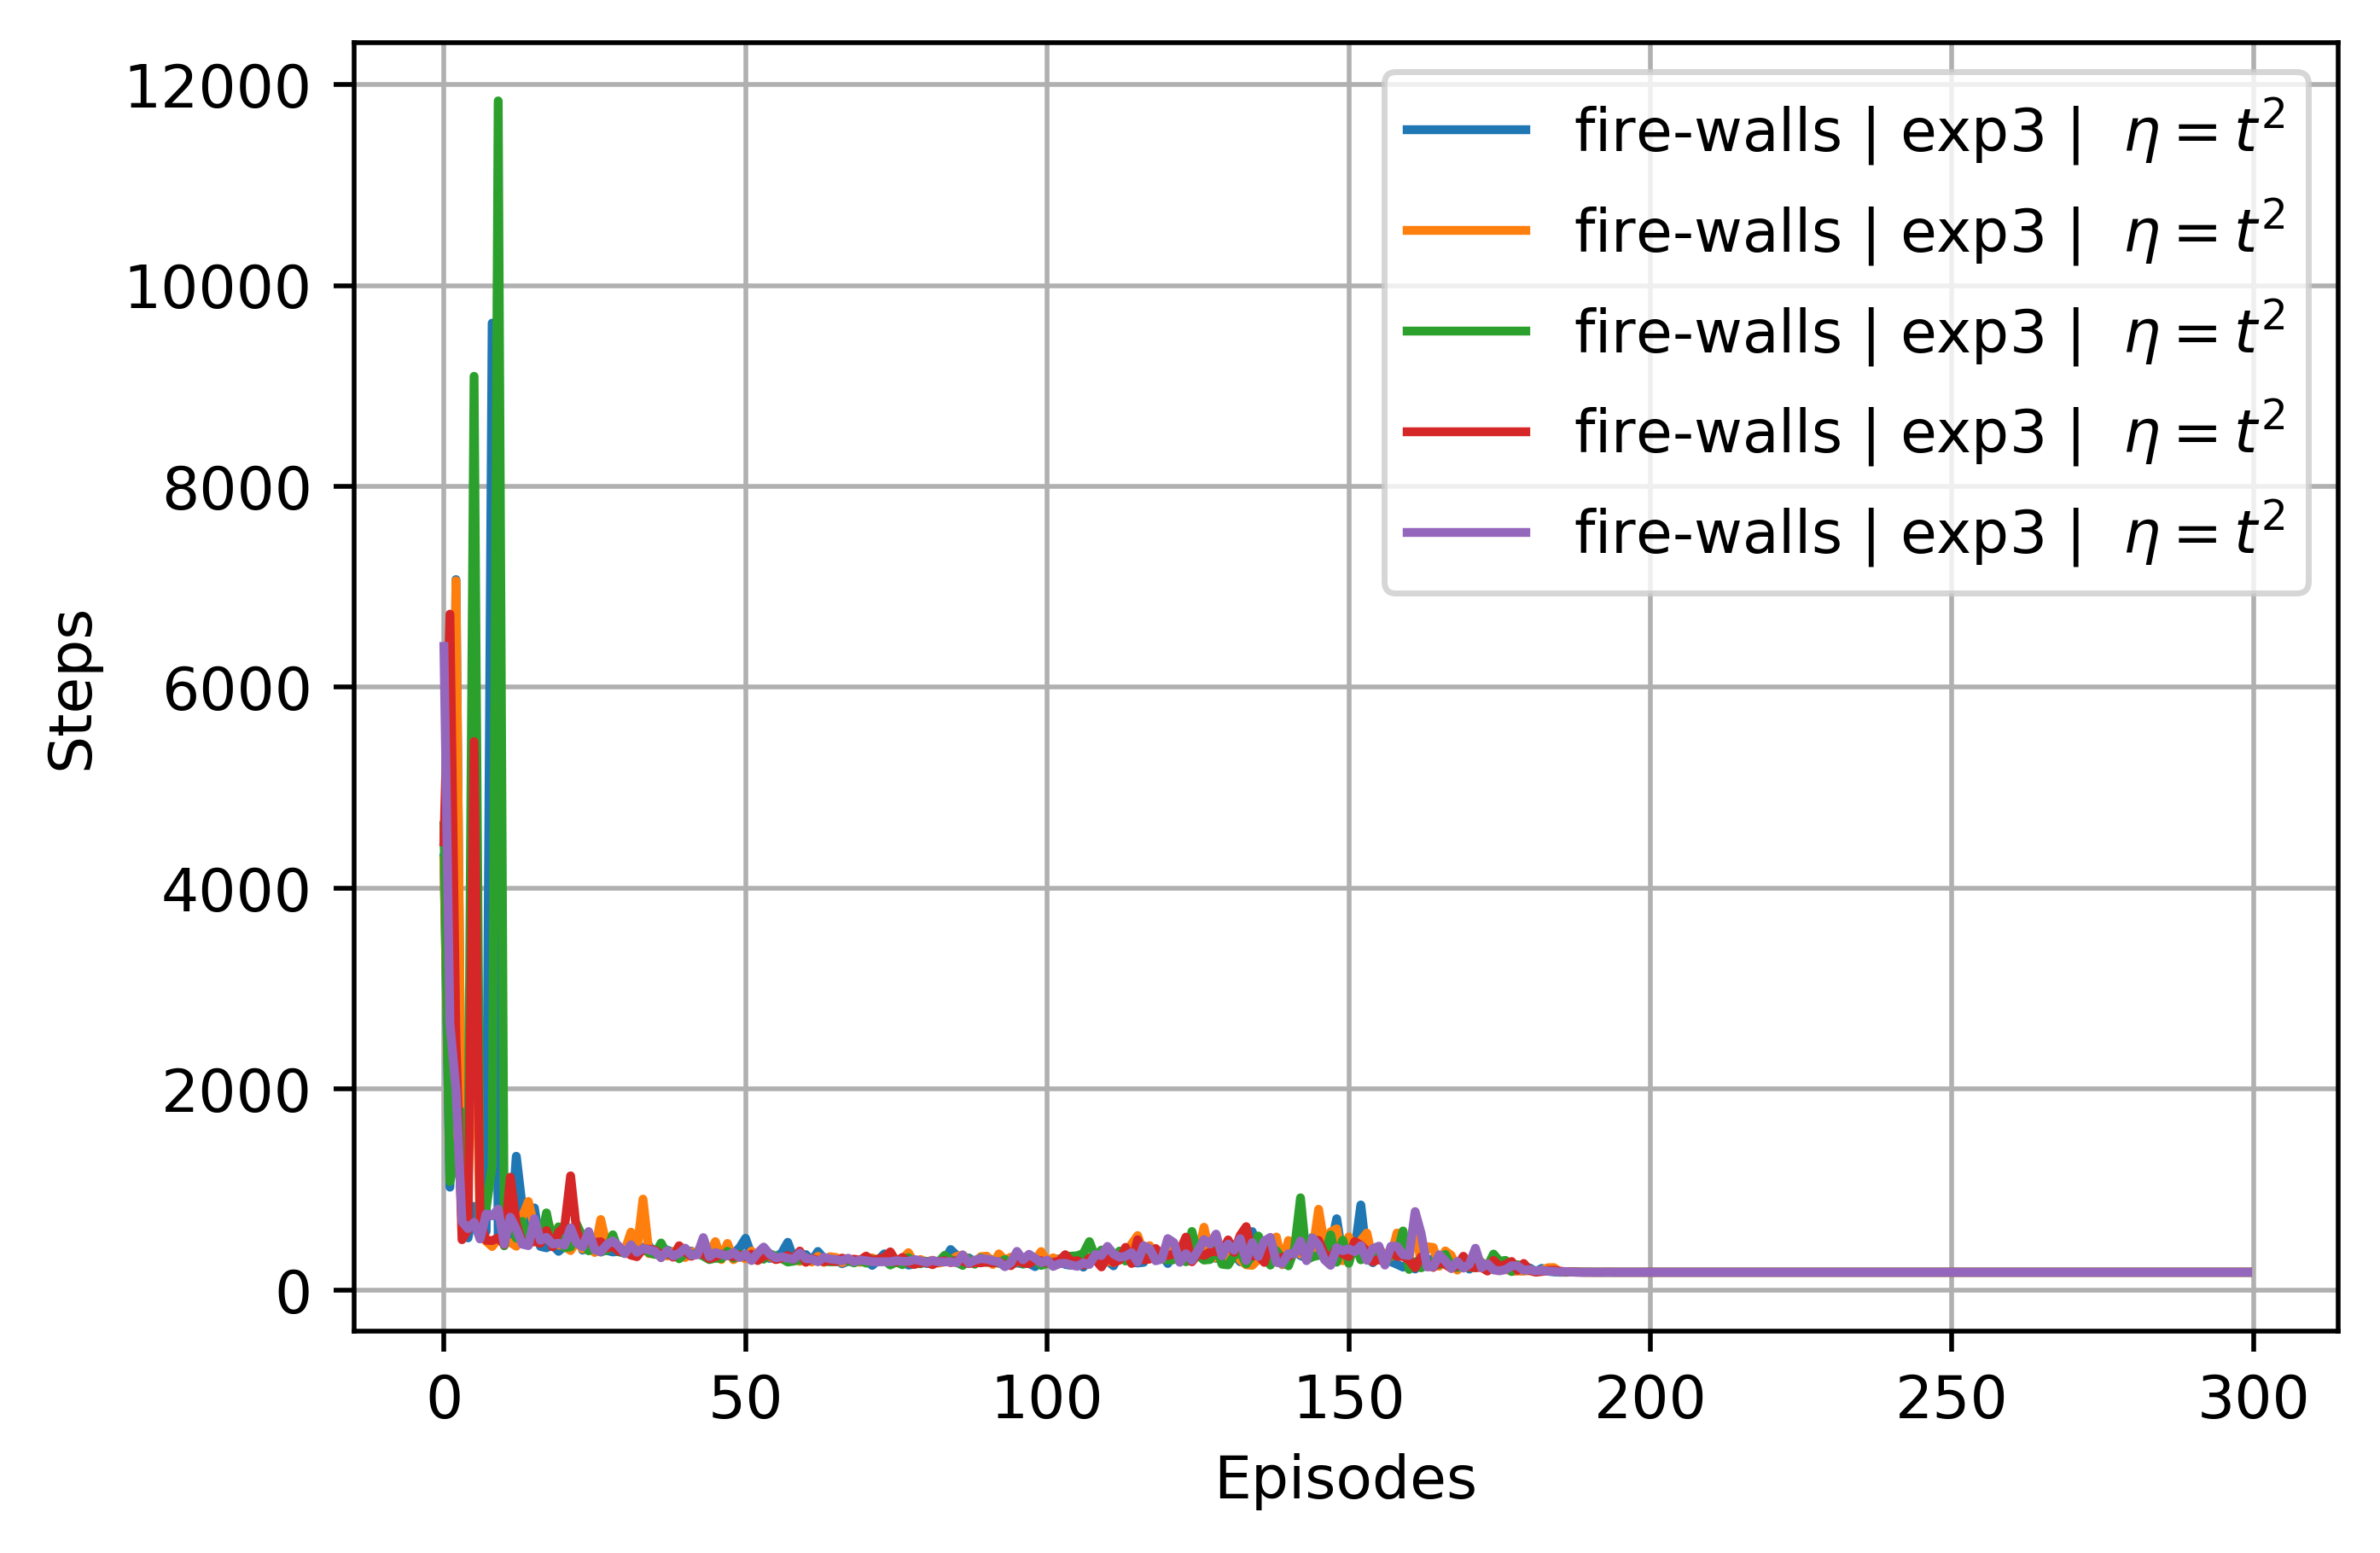

In [64]:
plot_steps_per_episode_comp([exp3_t2,exp3_t2_2,exp3_t2_3,exp3_t2_4,exp3_t2_5], dpi=500)

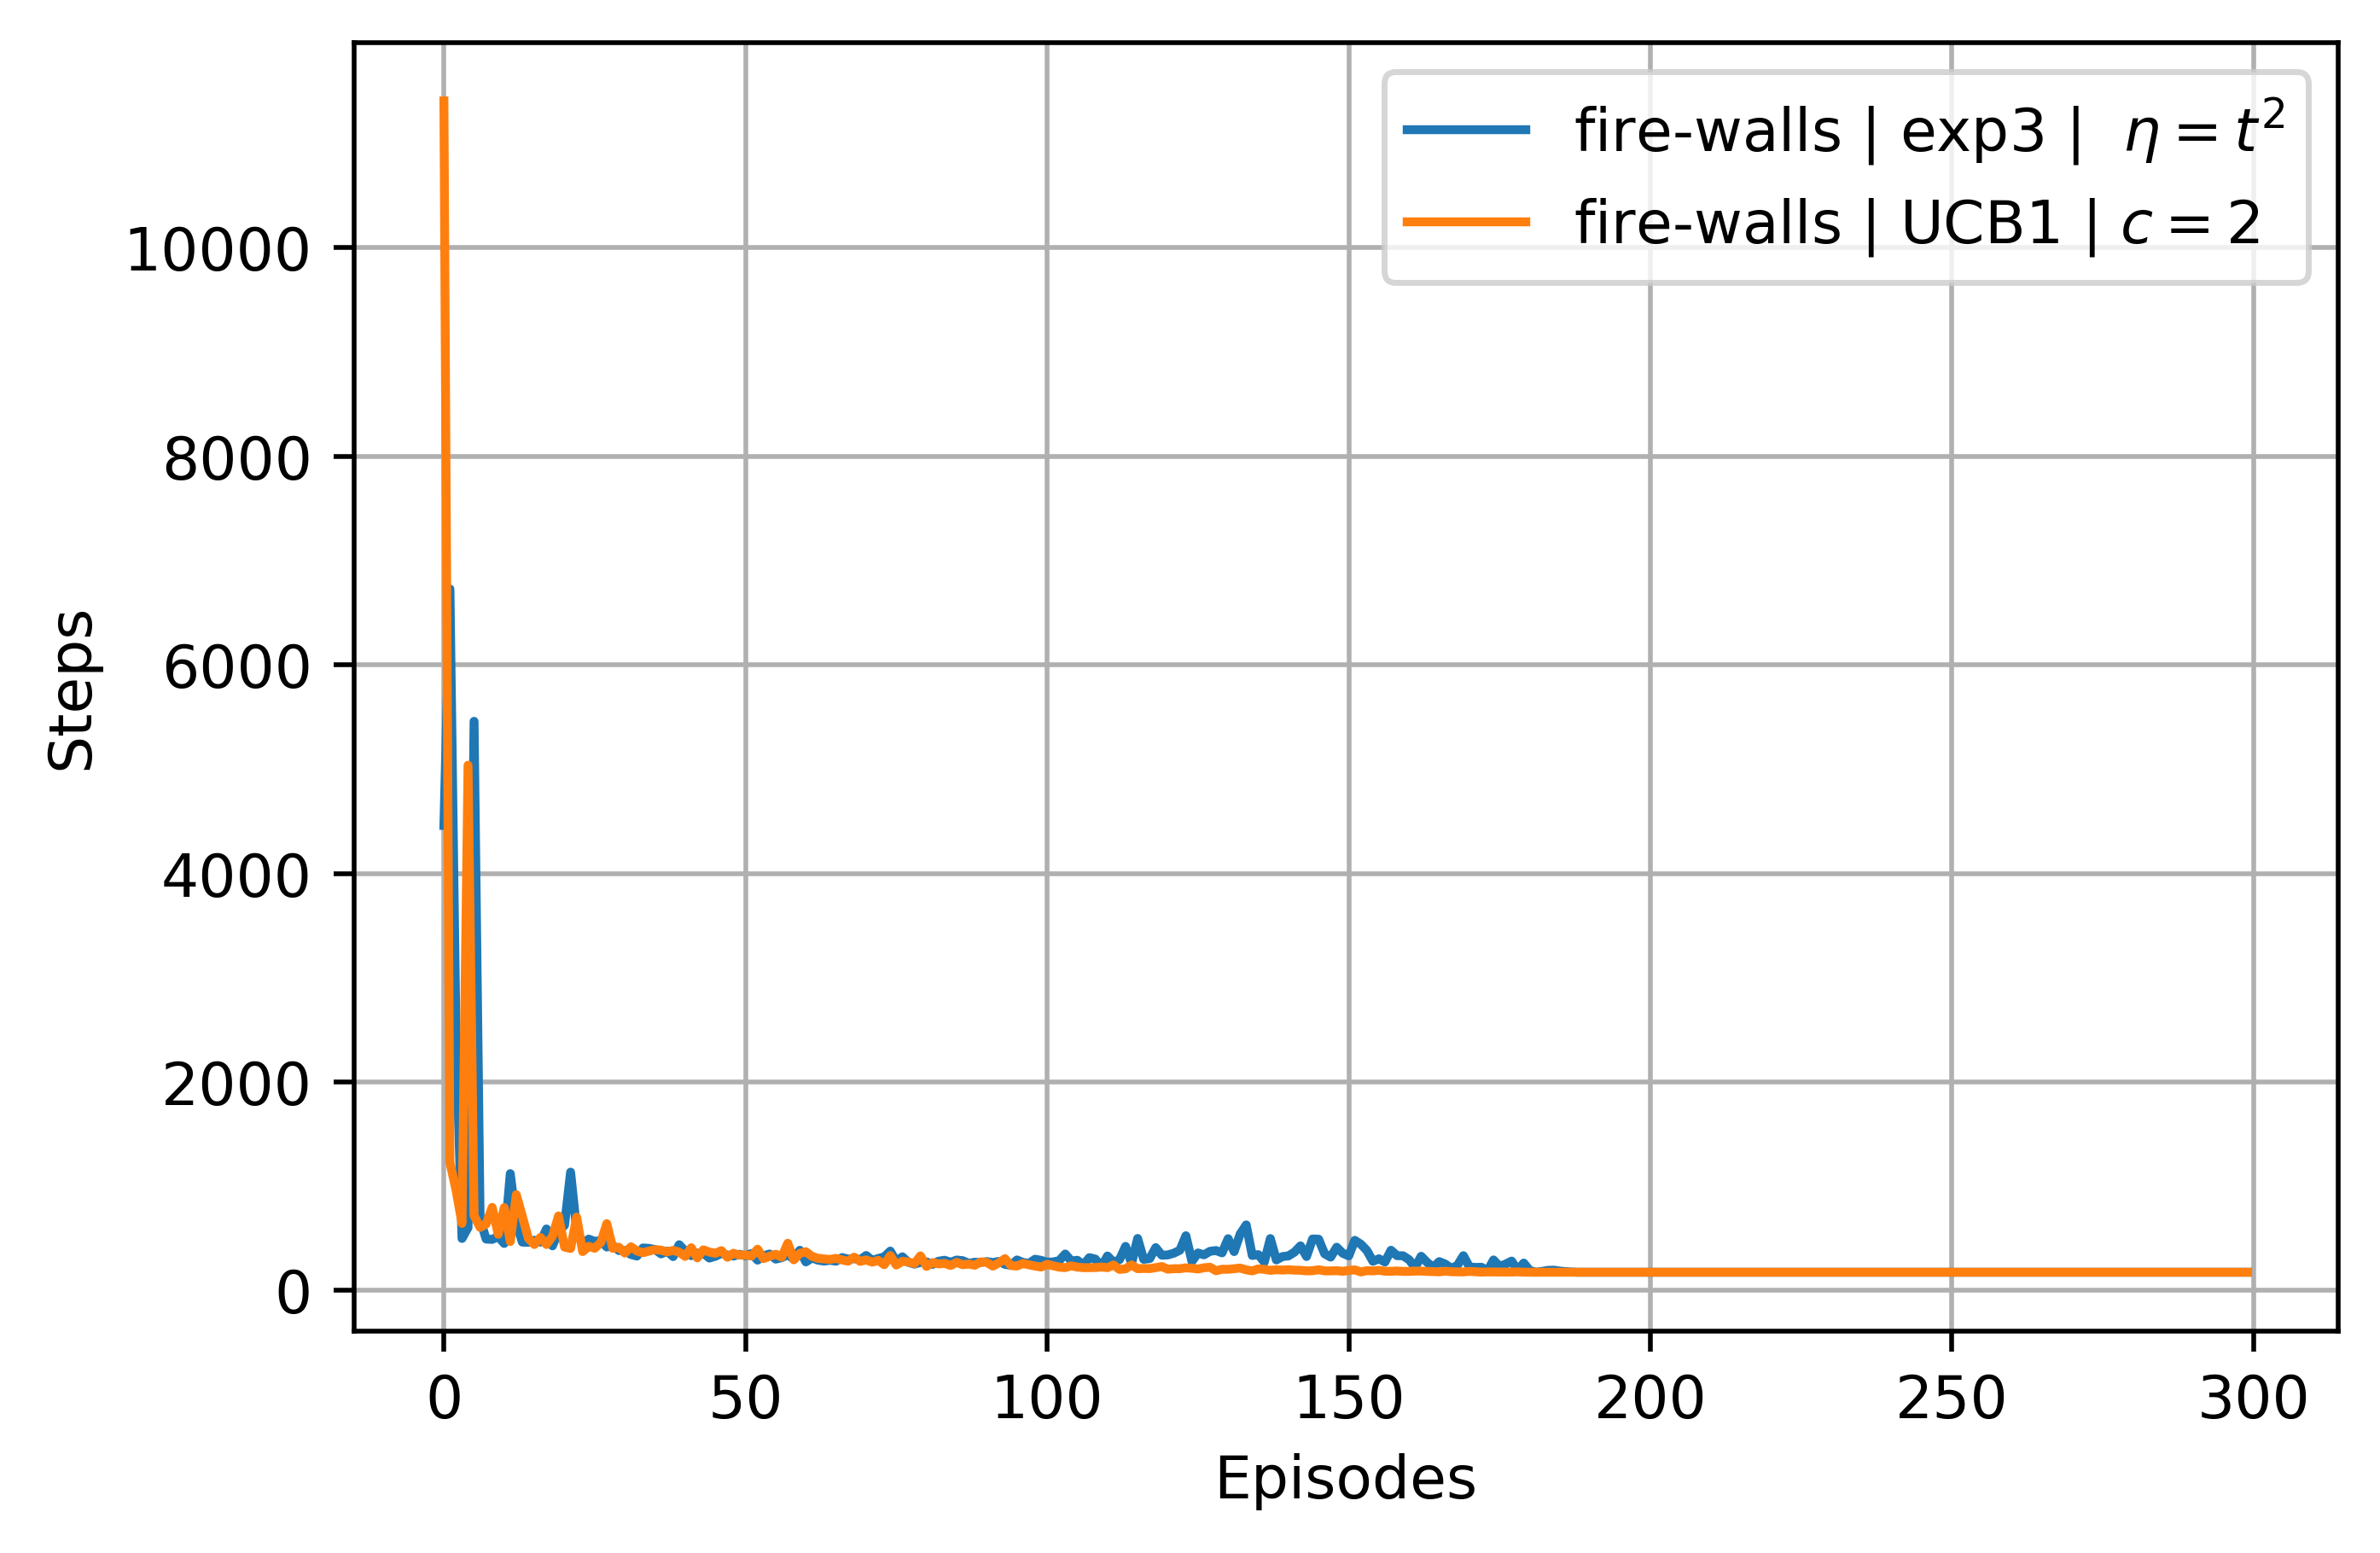

In [70]:
plot_steps_per_episode_comp([exp3_t2_4,ucb1], dpi=500)


### Uso de
```python
while(stack):
    stack.pop() #borrar el ultimo elemento
```

In [157]:
lista = [1,2,3,4,5]
while (lista):
    print(lista.pop())
    print(lista)

5
[1, 2, 3, 4]
4
[1, 2, 3]
3
[1, 2]
2
[1]
1
[]


In [159]:
set([1,2,3,4,5])

{1, 2, 3, 4, 5}